In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import statsmodels.api as sm
import warnings
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
#Read the dataset
data=pd.read_excel("C:/Users/omar alaoui/Desktop/CSI4900/variables independantes/data_final.xlsx")
data.head()

,Date,Open,High,Low,Close,MA_20,MA_50,MA_100,MA_200,Stoch_K,...,RSI_MA,ADX,MACD,Close_VIX,Close_NASDAQ,Close_DAX,Close_GOLD,Close_CPI,Close_NFP,Close_T_chomage
0,2013-01-02,1426.19,1462.43,1426.19,1462.42,1390.67455,1421.6443,1411.5234,1424.9335,52.699795,...,53.309777,13.206005,6.184123,14.68,2746.46997,7778.78,1686.8860,229.6,243000,8.0
1,2013-01-03,1462.42,1465.47,1455.53,1459.37,1390.95055,1422.2158,1411.5640,1427.5495,82.404153,...,53.554508,14.232887,8.194474,14.56,2732.26001,7756.44,1664.0250,229.6,243000,8.0
2,2013-01-04,1459.37,1467.94,1458.99,1466.47,1391.23415,1422.8525,1412.2296,1430.4090,96.274507,...,54.056273,15.299410,10.242532,13.83,2724.48999,7776.37,1655.7705,229.6,243000,8.0
3,2013-01-07,1466.47,1466.47,1456.62,1461.89,1391.51600,1423.4127,1412.7910,1432.8065,93.391723,...,54.590883,16.086106,11.365056,13.79,2724.21997,7732.66,1646.9935,229.6,243000,8.0
4,2013-01-08,1461.89,1461.89,1451.64,1457.15,1391.78730,1423.9431,1413.6718,1434.7605,91.259726,...,54.764475,16.387387,11.736890,13.62,2718.71997,7695.83,1659.2565,229.6,243000,8.0


In [3]:
#Deleting the date column
data = data.drop(columns='Date')

#Displaying the first rows of the dataframe to check
data.head()

,Open,High,Low,Close,MA_20,MA_50,MA_100,MA_200,Stoch_K,Stoch_D,...,RSI_MA,ADX,MACD,Close_VIX,Close_NASDAQ,Close_DAX,Close_GOLD,Close_CPI,Close_NFP,Close_T_chomage
0,1426.19,1462.43,1426.19,1462.42,1390.67455,1421.6443,1411.5234,1424.9335,52.699795,35.738707,...,53.309777,13.206005,6.184123,14.68,2746.46997,7778.78,1686.8860,229.6,243000,8.0
1,1462.42,1465.47,1455.53,1459.37,1390.95055,1422.2158,1411.5640,1427.5495,82.404153,55.412018,...,53.554508,14.232887,8.194474,14.56,2732.26001,7756.44,1664.0250,229.6,243000,8.0
2,1459.37,1467.94,1458.99,1466.47,1391.23415,1422.8525,1412.2296,1430.4090,96.274507,77.126151,...,54.056273,15.299410,10.242532,13.83,2724.48999,7776.37,1655.7705,229.6,243000,8.0
3,1466.47,1466.47,1456.62,1461.89,1391.51600,1423.4127,1412.7910,1432.8065,93.391723,90.690128,...,54.590883,16.086106,11.365056,13.79,2724.21997,7732.66,1646.9935,229.6,243000,8.0
4,1461.89,1461.89,1451.64,1457.15,1391.78730,1423.9431,1413.6718,1434.7605,91.259726,93.641985,...,54.764475,16.387387,11.736890,13.62,2718.71997,7695.83,1659.2565,229.6,243000,8.0


1) Interpolation to fill in missing values:

In [5]:
#Check for missing values, including NaN, '?', and empty strings
missing_values = (data.isnull() | data.eq('?') | data.eq('')).sum()
#Display the number of missing values per column
print("\nMissing values for each column:")
print(missing_values) 


Missing values for each column:
Open               0
High               0
Low                0
Close              0
MA_20              0
MA_50              0
MA_100             0
MA_200             0
Stoch_K            0
Stoch_D            0
RSI_28             0
RSI_MA             0
ADX                0
MACD               0
Close_VIX          0
Close_NASDAQ       0
Close_DAX          0
Close_GOLD         0
Close_CPI          0
Close_NFP          0
Close_T_chomage    0
dtype: int64


##### In our case we dont have any missing values but to demonstrate the efficiency of the piecewise cubic spline interpolation, I duplicated the data frame and deleted values randomly from columns 

In [7]:
# Lire le dataset
data_inter=pd.read_excel("C:/Users/omar alaoui/Desktop/CSI4900/variables independantes/data_final pour interpolation.xlsx")
data_inter.head()

,Date,Open,High,Low,Close,MA_20,MA_50,MA_100,MA_200,Stoch_K,...,RSI_MA,ADX,MACD,Close_VIX,Close_NASDAQ,Close_DAX,Close_GOLD,Close_CPI,Close_NFP,Close_T_chomage
0,2013-01-02,1426.19,1462.43,1426.19,1462.42,1390.67455,1421.6443,1411.5234,1424.9335,52.699795,...,53.309777,13.206005,6.184123,14.68,2746.46997,7778.78,1686.8860,229.6,243000,8.0
1,2013-01-03,1462.42,1465.47,1455.53,1459.37,1390.95055,1422.2158,1411.5640,1427.5495,82.404153,...,53.554508,14.232887,8.194474,14.56,2732.26001,7756.44,1664.0250,229.6,243000,8.0
2,2013-01-04,1459.37,1467.94,1458.99,1466.47,1391.23415,1422.8525,1412.2296,1430.4090,96.274507,...,54.056273,15.299410,10.242532,13.83,2724.48999,7776.37,1655.7705,229.6,243000,8.0
3,2013-01-07,1466.47,1466.47,1456.62,1461.89,1391.51600,1423.4127,1412.7910,1432.8065,93.391723,...,54.590883,16.086106,11.365056,13.79,2724.21997,7732.66,1646.9935,229.6,243000,8.0
4,2013-01-08,1461.89,1461.89,1451.64,1457.15,1391.78730,1423.9431,1413.6718,1434.7605,91.259726,...,54.764475,16.387387,11.736890,13.62,2718.71997,7695.83,1659.2565,229.6,243000,8.0


In [8]:
# Suppression des colonnes
data_inter = data_inter.drop(columns='Date')
# Affichage des premières lignes du DataFrame pour vérifier
data_inter.head()

,Open,High,Low,Close,MA_20,MA_50,MA_100,MA_200,Stoch_K,Stoch_D,...,RSI_MA,ADX,MACD,Close_VIX,Close_NASDAQ,Close_DAX,Close_GOLD,Close_CPI,Close_NFP,Close_T_chomage
0,1426.19,1462.43,1426.19,1462.42,1390.67455,1421.6443,1411.5234,1424.9335,52.699795,35.738707,...,53.309777,13.206005,6.184123,14.68,2746.46997,7778.78,1686.8860,229.6,243000,8.0
1,1462.42,1465.47,1455.53,1459.37,1390.95055,1422.2158,1411.5640,1427.5495,82.404153,55.412018,...,53.554508,14.232887,8.194474,14.56,2732.26001,7756.44,1664.0250,229.6,243000,8.0
2,1459.37,1467.94,1458.99,1466.47,1391.23415,1422.8525,1412.2296,1430.4090,96.274507,77.126151,...,54.056273,15.299410,10.242532,13.83,2724.48999,7776.37,1655.7705,229.6,243000,8.0
3,1466.47,1466.47,1456.62,1461.89,1391.51600,1423.4127,1412.7910,1432.8065,93.391723,90.690128,...,54.590883,16.086106,11.365056,13.79,2724.21997,7732.66,1646.9935,229.6,243000,8.0
4,1461.89,1461.89,1451.64,1457.15,1391.78730,1423.9431,1413.6718,1434.7605,91.259726,93.641985,...,54.764475,16.387387,11.736890,13.62,2718.71997,7695.83,1659.2565,229.6,243000,8.0


Open doesn't contain missing values!
High doesn't contain missing values!
Low doesn't contain missing values!
Close doesn't contain missing values!
MA_20 doesn't contain missing values!
MA_50 doesn't contain missing values!
MA_100 doesn't contain missing values!
MA_200 doesn't contain missing values!
Stoch_K doesn't contain missing values!
Stoch_D doesn't contain missing values!
RSI_28 doesn't contain missing values!
Interpolating missing values for column: RSI_MA
Column: RSI_MA
Total Missing Values: 93
Correct Predictions: 56
Accuracy: 60.22%



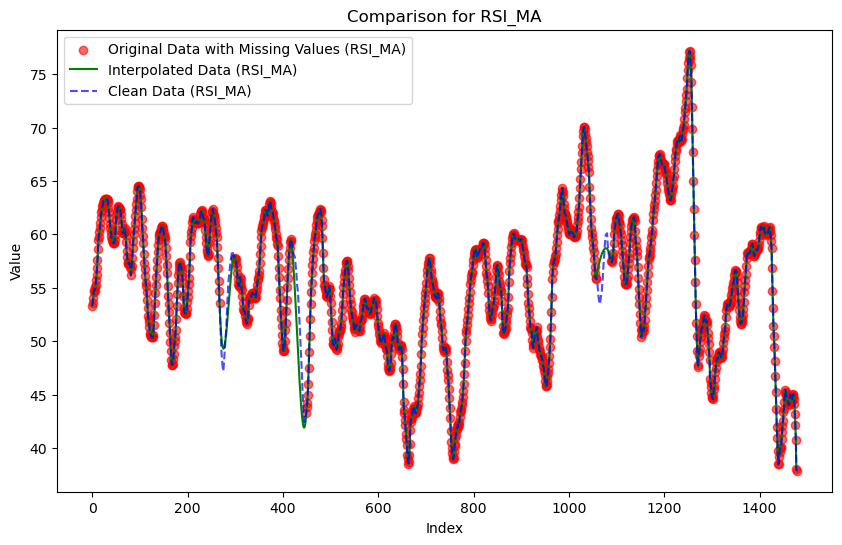

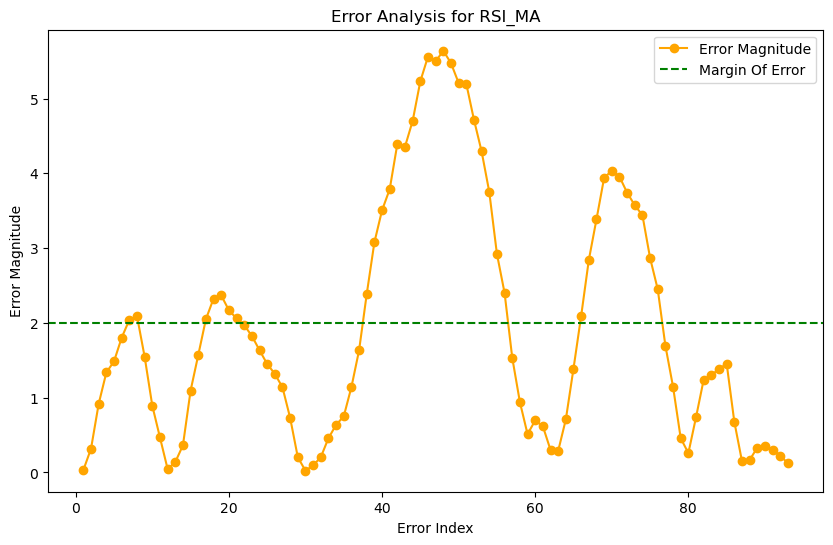

ADX doesn't contain missing values!
MACD doesn't contain missing values!
Close_VIX doesn't contain missing values!
Close_NASDAQ doesn't contain missing values!
Close_DAX doesn't contain missing values!
Close_GOLD doesn't contain missing values!
Close_CPI doesn't contain missing values!
Close_NFP doesn't contain missing values!
Close_T_chomage doesn't contain missing values!


In [9]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

# Function for cubic spline interpolation
def fill_missing_with_cubic_spline(x, y):
    """
    Perform piecewise cubic spline interpolation to fill missing values in the dataset.

    Parameters:
    - x: 1D array-like, the independent variable (e.g., indices or time).
    - y: 1D array-like, the dependent variable with missing values.

    Returns:
    - y_interpolated: 1D array-like, the interpolated data with missing values filled.
    - spline: CubicSpline object, the spline model for further use or visualization.
    """
    # Ensure x and y are Numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Mask valid (non-missing) values
    valid_mask = ~np.isnan(y)  # Identify non-NaN values
    x_valid = x[valid_mask]
    y_valid = y[valid_mask]

    # Create a cubic spline interpolator
    spline = CubicSpline(x_valid, y_valid, bc_type='natural')  # Natural spline condition

    # Interpolate to fill missing values
    y_interpolated = spline(x)

    return y_interpolated, spline

# Replace missing values in the dataset using cubic spline interpolation and calculate accuracy
for column in data_inter.columns:
    if data_inter[column].isnull().any():  # Check if the column has missing values
        print(f"Interpolating missing values for column: {column}")
        
        # Save the original column with NaNs for visualization
        original_data_with_nans = data_inter[column].copy()
        
        # Perform interpolation
        x_indices = np.arange(len(data_inter))  # Use row indices as x
        y_filled, spline_model = fill_missing_with_cubic_spline(x_indices, data_inter[column])
        data_inter[column] = y_filled  # Replace the column with interpolated values
        
        # Count total missing values
        total_missing = original_data_with_nans.isna().sum()
        
        # Compare interpolated values with real values
        real_values = data[column][original_data_with_nans.isna()]  # Real values from clean data
        interpolated_values = y_filled[original_data_with_nans.isna()]  # Interpolated values
        errors = interpolated_values - real_values  # Calculate the errors
        correct_predictions = np.sum(np.abs(errors) <= 2)  # Within ±2 margin
        accuracy = (correct_predictions / total_missing) * 100  # Accuracy percentage

        # Print statistics
        print(f"Column: {column}")
        print(f"Total Missing Values: {total_missing}")
        print(f"Correct Predictions: {correct_predictions}")
        print(f"Accuracy: {accuracy:.2f}%\n")

        # Visualization: Plot both the data with missing values and clean data
        plt.figure(figsize=(10, 6))
        
        # Plot original data (with missing values, shown as points)
        plt.scatter(
            np.arange(len(original_data_with_nans))[~original_data_with_nans.isna()],
            original_data_with_nans.dropna(),
            label=f'Original Data with Missing Values ({column})',
            color='red',
            alpha=0.6
        )
        
        # Plot interpolated data as a continuous line
        plt.plot(data_inter[column], label=f'Interpolated Data ({column})', color='green')
        
        # Plot the clean data from the dataframe without missing values
        plt.plot(data[column], label=f'Clean Data ({column})', color='blue', linestyle='--', alpha=0.7)
        
        # Add titles and legend
        plt.title(f"Comparison for {column}")
        plt.legend()
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.show()

        # Visualization: Plot errors
        plt.figure(figsize=(10, 6))
        error_indices = np.arange(1, len(errors) + 1)  # Number errors from 1 to total missing values
        plt.plot(error_indices, np.abs(errors), marker='o', linestyle='-', color='orange', label='Error Magnitude')
        plt.axhline(2, color='green', linestyle='--', label='Margin Of Error')  # ±2 margin threshold
        plt.title(f"Error Analysis for {column}")
        plt.xlabel("Error Index")
        plt.ylabel("Error Magnitude")
        plt.legend()
        plt.show()
    else:
        print(f"{column} doesn't contain missing values!")


In [10]:
#Créer High_tomorrow en décalant la colonne 'high' d'un pas :
data['High_tomorrow'] = data['High'].shift(-1)
data = data.dropna(subset=['High_tomorrow']) # Supprimez les dernières lignes avec des valeurs manquantes

data.head()

,Open,High,Low,Close,MA_20,MA_50,MA_100,MA_200,Stoch_K,Stoch_D,...,ADX,MACD,Close_VIX,Close_NASDAQ,Close_DAX,Close_GOLD,Close_CPI,Close_NFP,Close_T_chomage,High_tomorrow
0,1426.19,1462.43,1426.19,1462.42,1390.67455,1421.6443,1411.5234,1424.9335,52.699795,35.738707,...,13.206005,6.184123,14.68,2746.46997,7778.78,1686.8860,229.6,243000,8.0,1465.47
1,1462.42,1465.47,1455.53,1459.37,1390.95055,1422.2158,1411.5640,1427.5495,82.404153,55.412018,...,14.232887,8.194474,14.56,2732.26001,7756.44,1664.0250,229.6,243000,8.0,1467.94
2,1459.37,1467.94,1458.99,1466.47,1391.23415,1422.8525,1412.2296,1430.4090,96.274507,77.126151,...,15.299410,10.242532,13.83,2724.48999,7776.37,1655.7705,229.6,243000,8.0,1466.47
3,1466.47,1466.47,1456.62,1461.89,1391.51600,1423.4127,1412.7910,1432.8065,93.391723,90.690128,...,16.086106,11.365056,13.79,2724.21997,7732.66,1646.9935,229.6,243000,8.0,1461.89
4,1461.89,1461.89,1451.64,1457.15,1391.78730,1423.9431,1413.6718,1434.7605,91.259726,93.641985,...,16.387387,11.736890,13.62,2718.71997,7695.83,1659.2565,229.6,243000,8.0,1464.73


In [11]:
data.tail()

,Open,High,Low,Close,MA_20,MA_50,MA_100,MA_200,Stoch_K,Stoch_D,...,ADX,MACD,Close_VIX,Close_NASDAQ,Close_DAX,Close_GOLD,Close_CPI,Close_NFP,Close_T_chomage,High_tomorrow
1473,2559.90,2573.99,2528.71,2546.16,2757.67405,2796.3722,2715.6084,2665.0035,6.615377,14.921353,...,28.943004,-41.077109,25.58,6491.52,10740.89,1249.392,252.038,97000,3.9,2585.29
1474,2547.05,2585.29,2488.96,2506.96,2756.56825,2793.2536,2708.0590,2655.8150,5.974325,9.134761,...,30.233054,-47.884223,25.58,6342.97,10766.21,1243.045,252.038,97000,3.9,2509.63
1475,2496.77,2509.63,2441.18,2467.42,2755.27135,2789.9018,2699.8006,2647.0915,6.506949,6.365550,...,31.850719,-55.825931,28.38,6243.19,10611.10,1259.956,252.038,97000,3.9,2504.41
1476,2465.38,2504.41,2408.55,2416.62,2753.65960,2785.9051,2692.4194,2635.4260,5.051167,5.844147,...,33.606623,-65.464296,30.11,6046.56,10633.82,1255.984,252.038,97000,3.9,2489.10
1477,2442.50,2489.10,2397.94,2488.83,2748.52325,2774.1721,2673.6462,2601.3985,24.254061,13.072764,...,36.135089,-73.584836,29.96,6288.30,10381.51,1275.606,252.038,97000,3.9,2520.27


In [12]:
# Creer liste avec les noms des colonnes
column_name=['Open', 'High', 'Low', 'Close', 'MA_20', 'MA_50', 'MA_100', 'MA_200', 'Stoch_K', 'Stoch_D', 'RSI_28', 'RSI_MA', 'ADX', 'MACD', 'Close_VIX', 'Close_NASDAQ', 'Close_DAX', 'Close_GOLD', 'Close_CPI', 'Close_NFP', 'Close_T_chomage']

### outliers

Looking for outliers

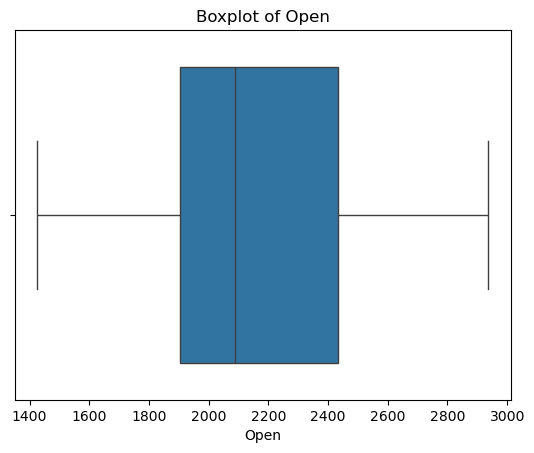

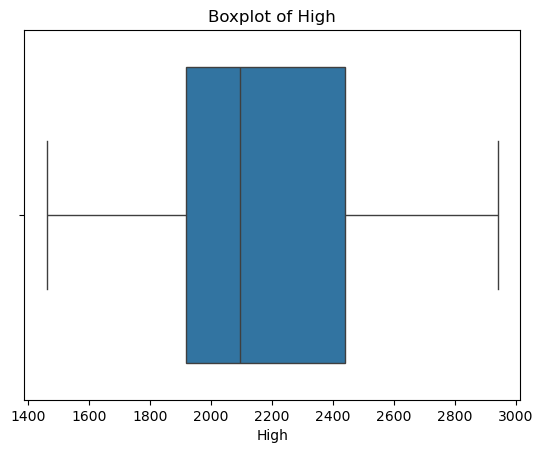

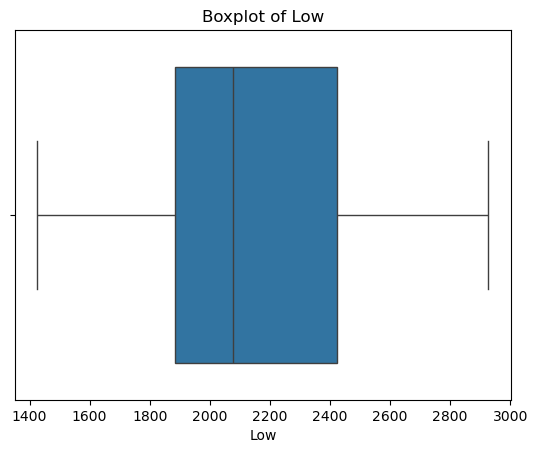

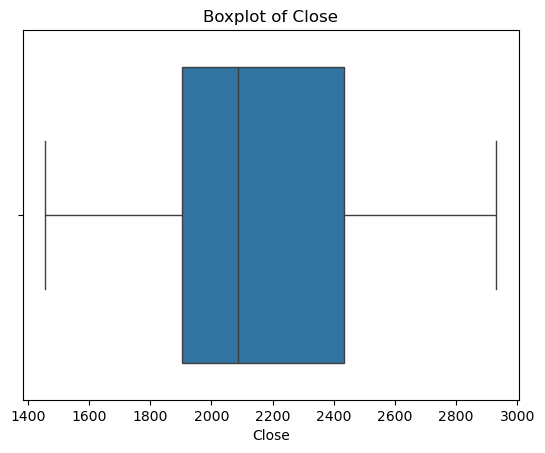

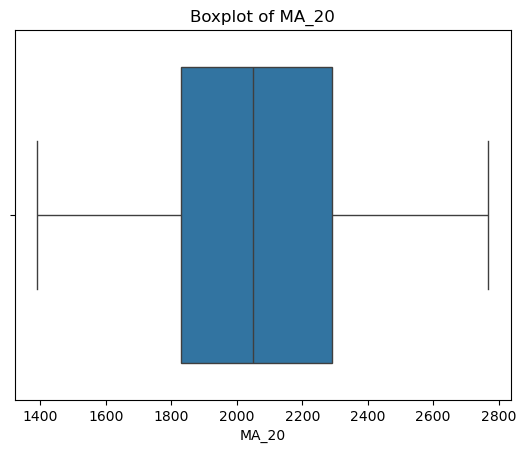

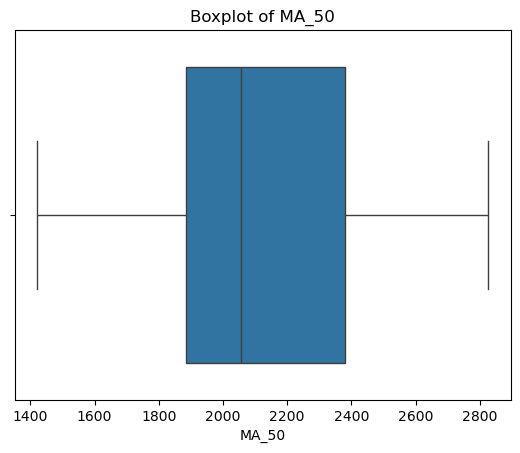

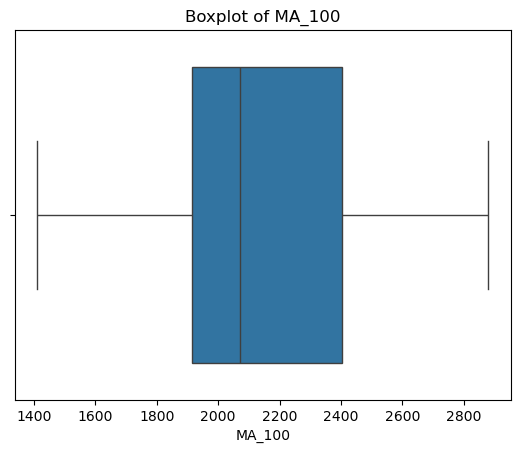

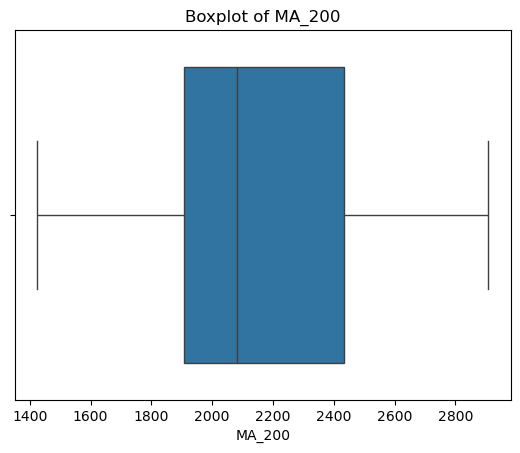

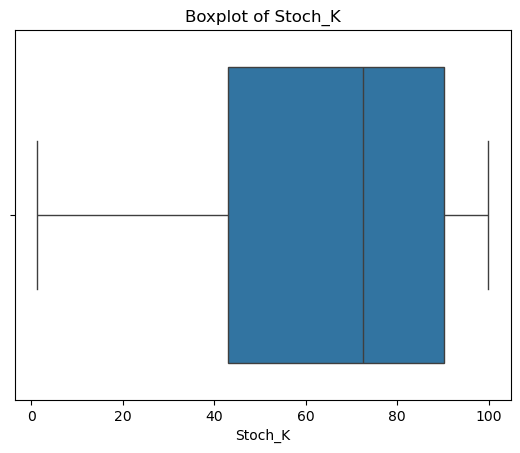

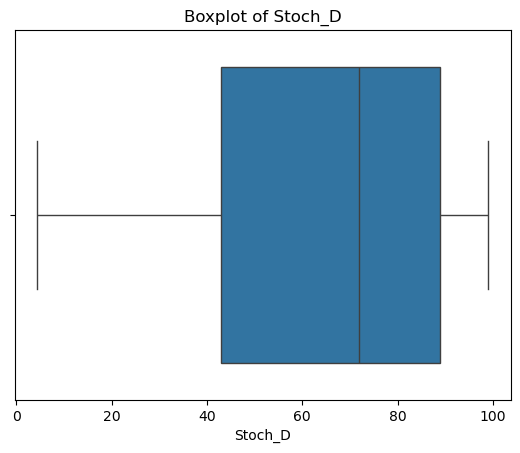

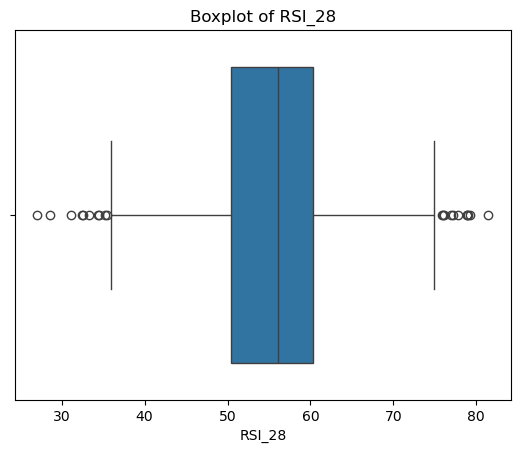

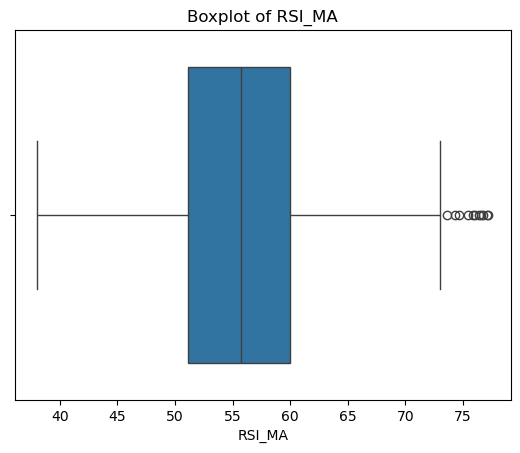

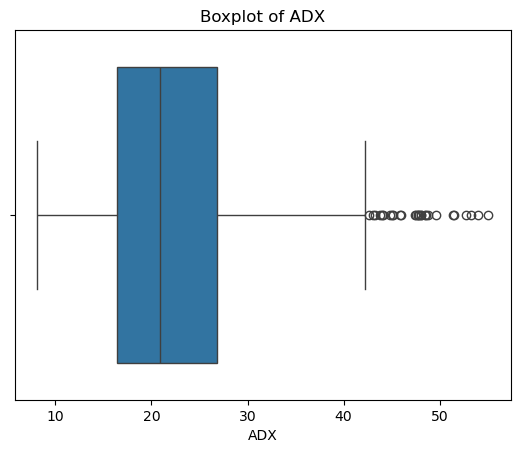

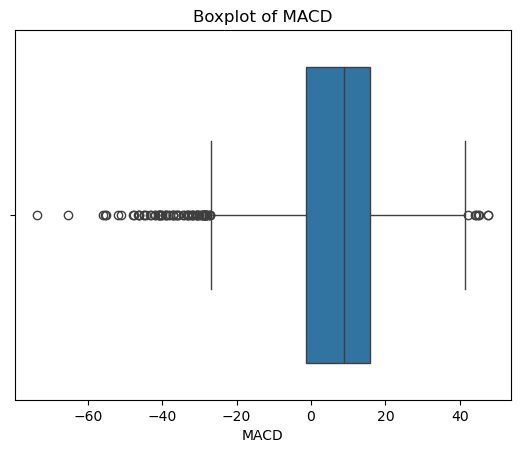

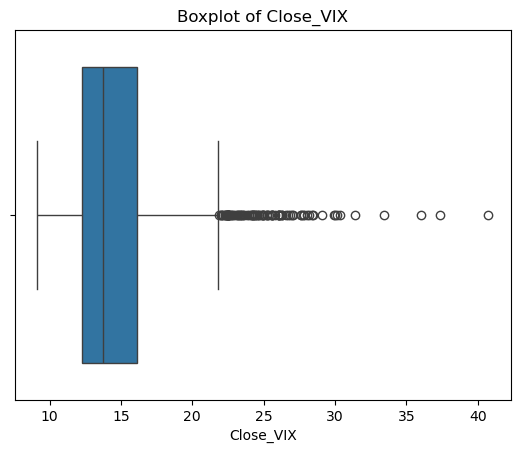

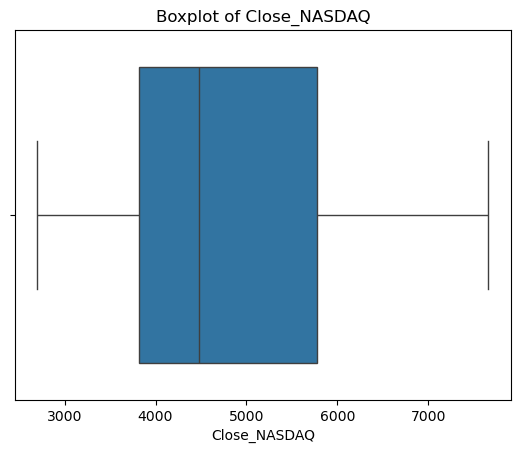

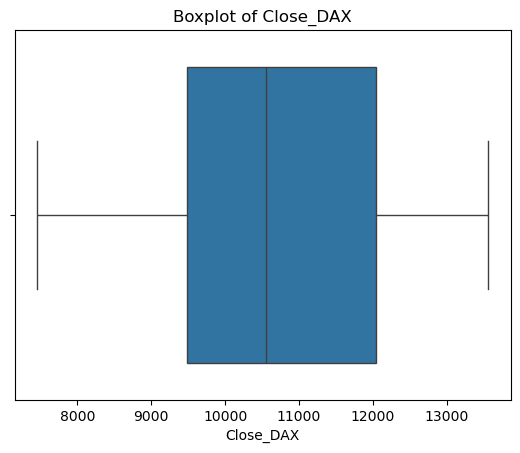

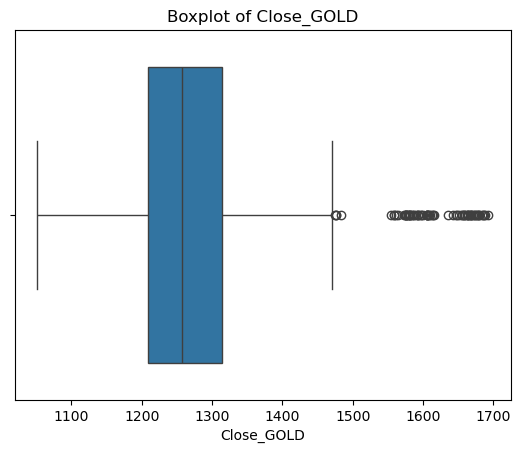

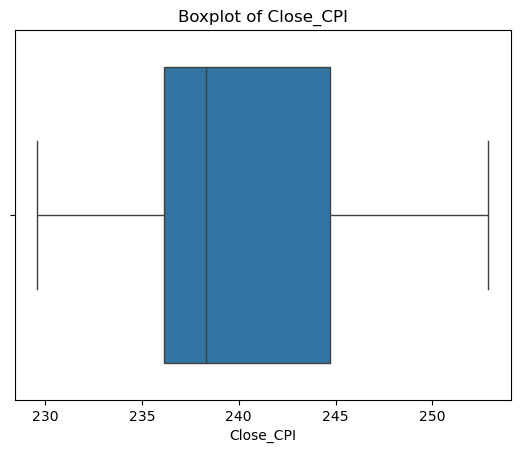

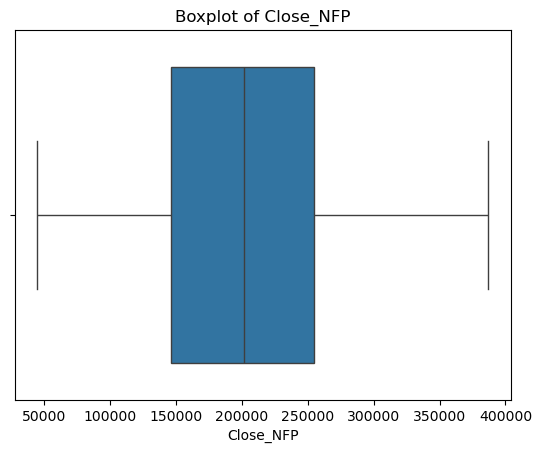

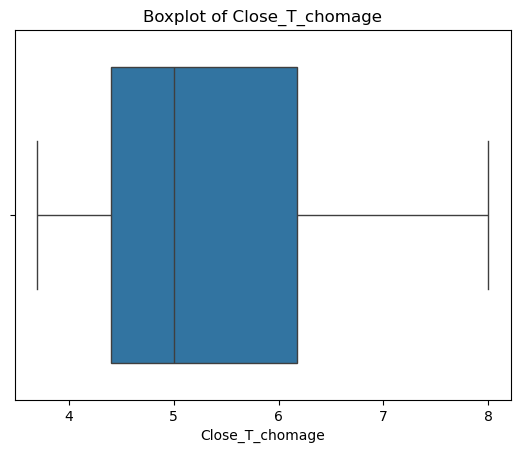

In [15]:
# Visualiser les outliers dans toutes les colonnes

for i in column_name:
    sns.boxplot(x=data[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

Quartile method to delete the outliers

Number of outliers in column Open: 0
Number of outliers in column High: 0
Number of outliers in column Low: 0
Number of outliers in column Close: 0
Number of outliers in column MA_20: 0
Number of outliers in column MA_50: 0
Number of outliers in column MA_100: 0
Number of outliers in column MA_200: 0
Number of outliers in column Stoch_K: 0
Number of outliers in column Stoch_D: 0
Number of outliers in column RSI_28: 21
Number of outliers in column RSI_MA: 11
Number of outliers in column ADX: 28
Number of outliers in column MACD: 79
Number of outliers in column Close_VIX: 92
Outliers in column Close_VIX have been replaced by the lower and upper bounds.


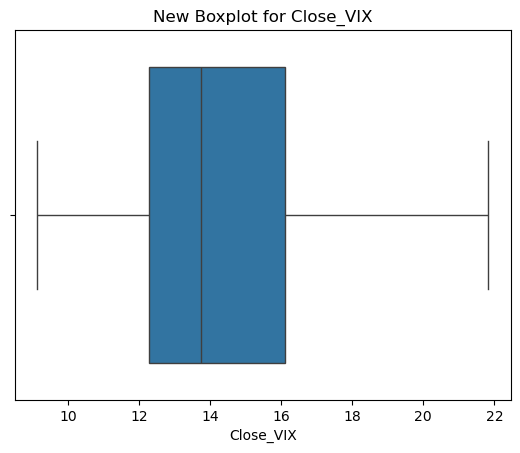

Number of outliers in column Close_NASDAQ: 0
Number of outliers in column Close_DAX: 0
Number of outliers in column Close_GOLD: 72
Number of outliers in column Close_CPI: 0
Number of outliers in column Close_NFP: 0
Number of outliers in column Close_T_chomage: 0


In [17]:
# Calculate the number of outliers in each column and apply corrections
for i in column_name:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)

    # Calculate the IQR (interquartile range)
    IQR = Q3 - Q1

    # Define the bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
    print(f"Number of outliers in column {i}: {len(outliers)}")

    # If the number of outliers is greater than or equal to 90, apply the clip method to replace outliers
    if len(outliers) >= 90:
        # Apply the clip method to replace values below the lower bound and above the upper bound
        data[i] = data[i].clip(lower=lower_bound, upper=upper_bound)
        print(f"Outliers in column {i} have been replaced by the lower and upper bounds.")

        # Visualize the new Boxplot
        sns.boxplot(x=data[i])
        plt.title(f'New Boxplot for {i}')
        plt.show()

### the distribution

plot the distribution of the independent var

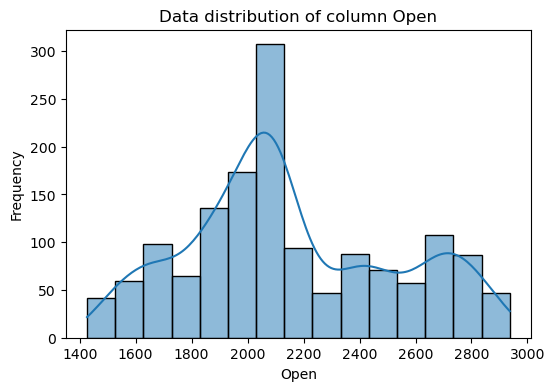

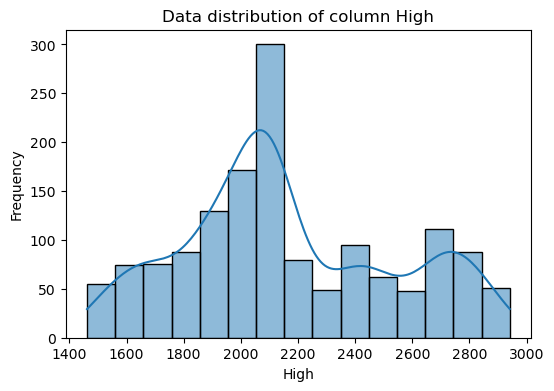

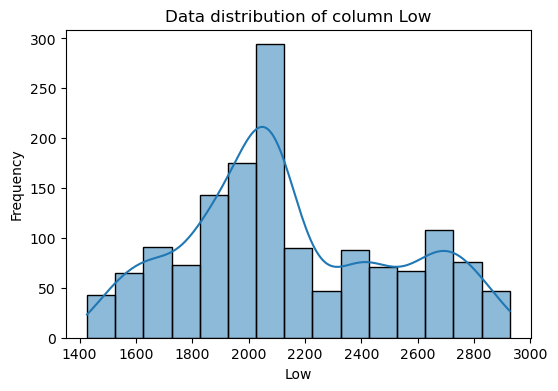

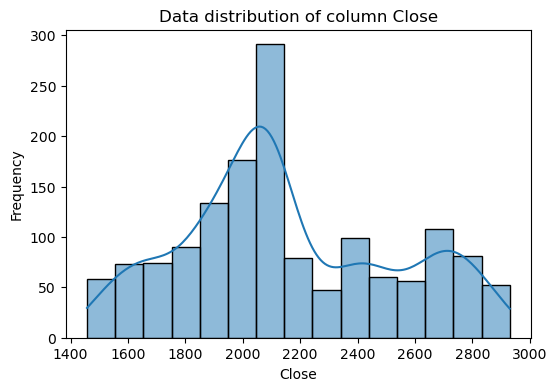

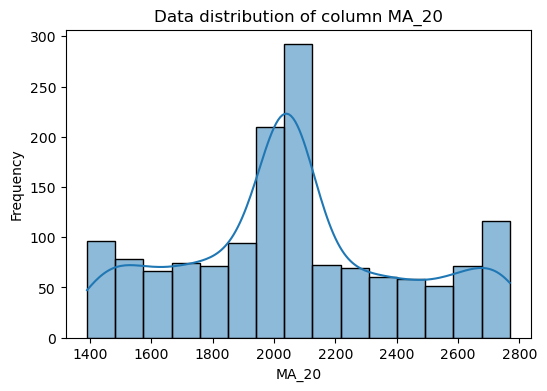

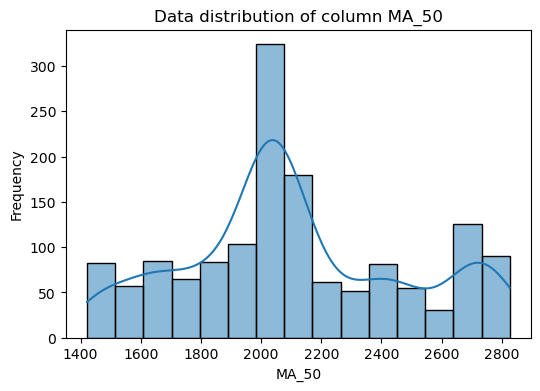

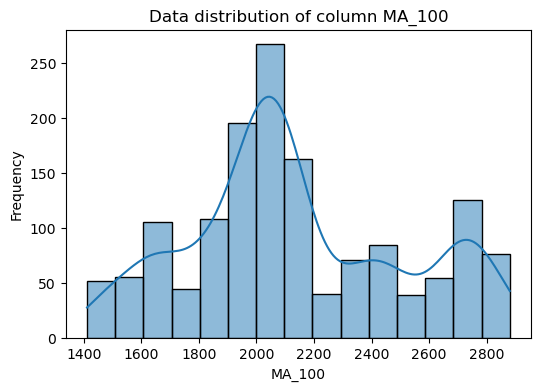

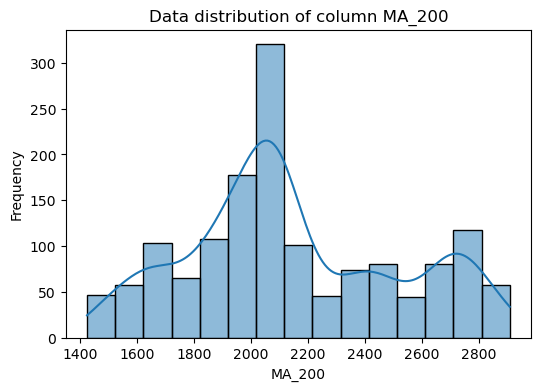

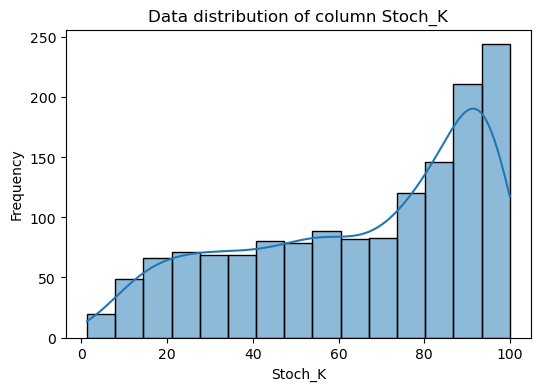

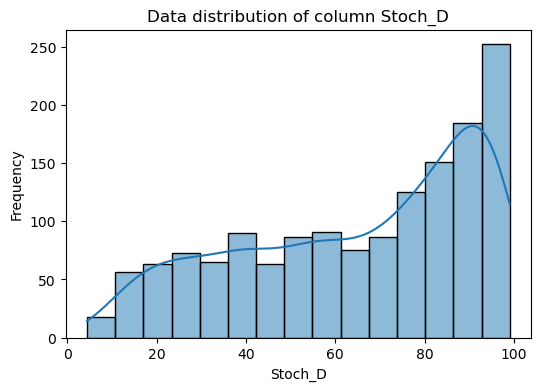

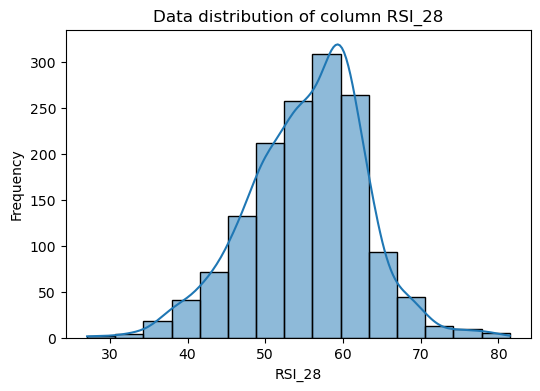

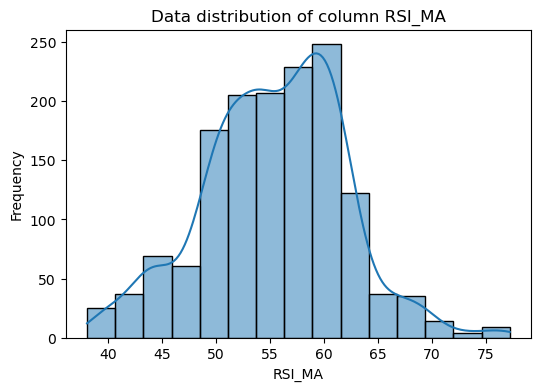

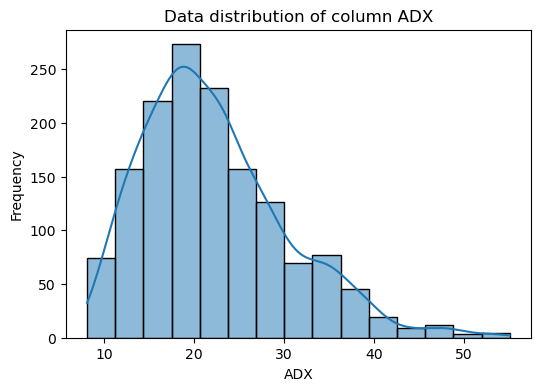

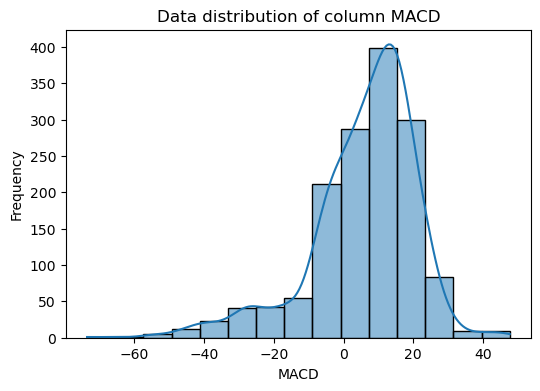

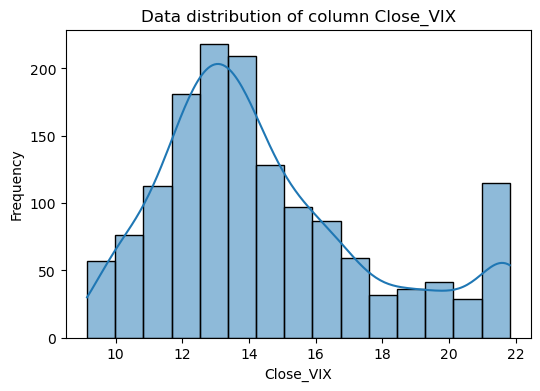

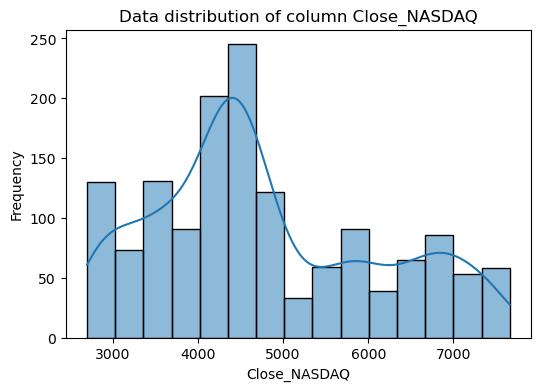

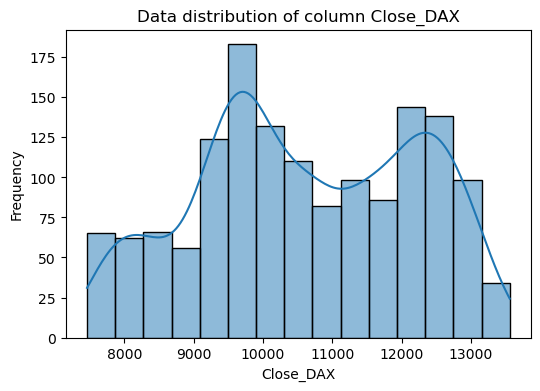

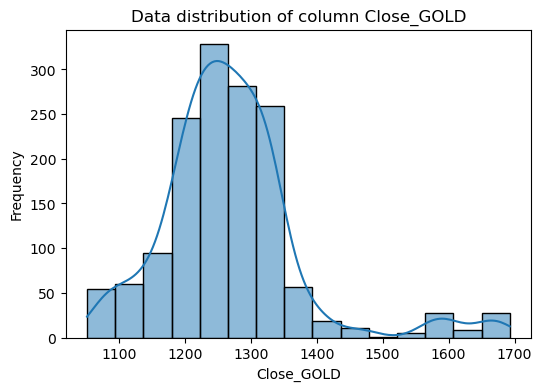

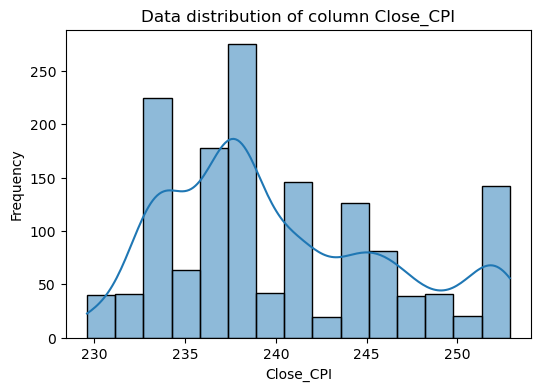

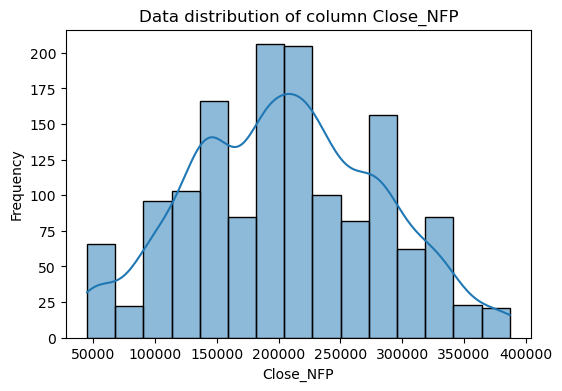

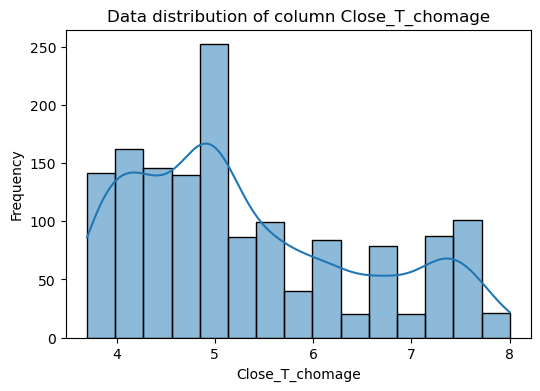

In [20]:
# Visualize the distribution of data in each column to see if they follow a normal distribution
# If not, apply a transformation.
for i in column_name:
    # 1. Visualization before the transformation (Histograms before standardization using Seaborn)
    plt.figure(figsize=(6, 4))
    sns.histplot(data[i], bins=15, kde=True, edgecolor='black')
    plt.title(f'Data distribution of column {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

transform the variables wiche doesnt have a normal distribution with the sqrt ( we tried log and boxcox)

In [22]:
#look for varibales with negative values
print(data.min())

Open                1426.190000
High                1461.890000
Low                 1426.190000
Close               1457.150000
MA_20               1390.674550
MA_50               1421.644300
MA_100              1411.523400
MA_200              1424.933500
Stoch_K                1.364605
Stoch_D                4.421462
RSI_28                27.059269
RSI_MA                38.054200
ADX                    8.137054
MACD                 -73.584836
Close_VIX              9.140000
Close_NASDAQ        2700.969970
Close_DAX           7459.960000
Close_GOLD          1051.706500
Close_CPI            229.600000
Close_NFP          45000.000000
Close_T_chomage        3.700000
High_tomorrow       1461.890000
dtype: float64


In [23]:
# Liste des colonnes pour la transformation logarithmique, en excluant RSI_28 et RSI_MA
sqrt_transform_columns = [
    'Open', 'High', 'Low', 'Close', 
    'MA_20', 'MA_50', 'MA_100', 'MA_200', 
    'Stoch_K', 'Stoch_D', 
    'ADX', 'Close_VIX', 'Close_NASDAQ', 'Close_DAX', 
    'Close_GOLD', 'Close_CPI', 'Close_NFP', 'Close_T_chomage'
]

# Appliquer la transformation racine carree à chaque colonne de la liste
for col in sqrt_transform_columns:
    # np.sqrt peut être utilisé directement si les valeurs sont strictement positives
    data[col] = np.sqrt(data[col])

# Vérification rapide
data[sqrt_transform_columns].head() 

,Open,High,Low,Close,MA_20,MA_50,MA_100,MA_200,Stoch_K,Stoch_D,ADX,Close_VIX,Close_NASDAQ,Close_DAX,Close_GOLD,Close_CPI,Close_NFP,Close_T_chomage
0,37.764931,38.241731,37.764931,38.241600,37.291749,37.704699,37.570246,37.748291,7.259462,5.978186,3.634007,3.831449,52.406774,88.197392,41.071718,15.152558,492.950302,2.828427
1,38.241600,38.281458,38.151409,38.201702,37.295449,37.712277,37.570787,37.782926,9.077673,7.443925,3.772650,3.815757,52.271025,88.070653,40.792463,15.152558,492.950302,2.828427
2,38.201702,38.313705,38.196728,38.294517,37.299251,37.720717,37.579643,37.820748,9.811957,8.782150,3.911446,3.718871,52.196647,88.183729,40.691160,15.152558,492.950302,2.828427
3,38.294517,38.294517,38.165691,38.234670,37.303029,37.728142,37.587112,37.852431,9.663939,9.523136,4.010749,3.713489,52.194061,87.935545,40.583168,15.152558,492.950302,2.828427
4,38.234670,38.234670,38.100394,38.172634,37.306666,37.735171,37.598827,37.878233,9.552996,9.676879,4.048134,3.690528,52.141346,87.725880,40.733972,15.152558,492.950302,2.828427


do bowcox to MACD because it has negative values

In [25]:
# Remplacer uniquement les valeurs négatives de MACD par 1
data.loc[data['MACD'] < 0, 'MACD'] = 1

# Appliquer la transformation Box-Cox
data['MACD'], lambda_macd = boxcox(data['MACD'])

# Afficher la valeur de lambda utilisée pour la transformation
print("Lambda utilisé pour la transformation Box-Cox de MACD :", lambda_macd)

Lambda utilisé pour la transformation Box-Cox de MACD : 0.26471230310015487


λ = 1: The transformation is identical to the original data (no modification).<br/>
λ = 0: The transformation corresponds to the natural logarithm (ln(x)).<br/>
λ < 1: Large values are compressed more strongly, reducing the effect of outliers.<br/>
λ > 1: Small values are amplified.

### 3 types of selection:

In [28]:
#utiliser le variable suivante to keep track of the smallest RMSE and the final model and variable_included
minimum_RMSE=0
final_model=0
variable_included=0

In [29]:
# Définir les variables dépendantes et indépendantes
X = data.drop(columns=['High_tomorrow'])
Y = data['High_tomorrow']

In [30]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

do the normalization ou the standardization

In [32]:
# Initialiser les scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Listes des colonnes pour chaque transformation
standardization_columns = [
    'Open', 'High', 'Low', 'Close', 
    'MA_20', 'MA_50', 'MA_100', 'MA_200', 
    'ADX', 'MACD', 'Close_VIX', 
    'Close_NASDAQ', 'Close_DAX', 'Close_GOLD', 
    'Close_CPI', 'Close_NFP'
]
normalization_columns = [
    'Stoch_K', 'Stoch_D', 'RSI_28', 
    'RSI_MA', 'Close_T_chomage'
]

# Appliquer la standardisation sur les colonnes sélectionnées de l'ensemble d'entraînement
X_train[standardization_columns] = standard_scaler.fit_transform(X_train[standardization_columns])
# Appliquer la même transformation sur l'ensemble de test
X_test[standardization_columns] = standard_scaler.transform(X_test[standardization_columns])

# Appliquer la normalisation sur les colonnes sélectionnées de l'ensemble d'entraînement
X_train[normalization_columns] = min_max_scaler.fit_transform(X_train[normalization_columns])
# Appliquer la même transformation sur l'ensemble de test
X_test[normalization_columns] = min_max_scaler.transform(X_test[normalization_columns])


function to calculate the mean rmse across the folds

In [34]:
#Validation croisée avec K=10 et calcul du RMSE moyen
def calculate_rmse(model, X, Y):
    mse = make_scorer(mean_squared_error, squared=False)  # squared=False retourne le RMSE au lieu du MSE
    scores = cross_val_score(model, X, Y, cv=10, scoring=mse)  # K=10
    return scores.mean()

forward selection

In [36]:
# Liste des variables candidates
variables = X.columns.tolist()
variables_included_forward = []
variables_available = variables.copy()
variables_eliminated = []  # Nouvelle liste pour les variables définitivement exclues

# Ignorer les avertissements pour une sortie plus propre
warnings.filterwarnings("ignore")

# Sélection pas à pas avec correction pour éviter la boucle infinie
while variables_available:
    pvalues_candidate = pd.Series(index=variables_available, dtype=float)

    # Étape de sélection progressive
    for var in variables_available:
        X_candidate = X_train[variables_included_forward + [var]]
        X_candidate = sm.add_constant(X_candidate)
        model = sm.OLS(Y_train, X_candidate).fit()
        pvalues_candidate[var] = model.pvalues[var]

    min_pvalue = pvalues_candidate.min()
    if min_pvalue < 0.05:
        best_var = pvalues_candidate.idxmin()
        variables_included_forward.append(best_var)
        variables_available.remove(best_var)
        print(f"Ajout de la variable '{best_var}' avec une p-value de {min_pvalue:.4f}")

        # Étape d'élimination rétrograde
        while True:
            X_temp = X_train[variables_included_forward]
            X_temp = sm.add_constant(X_temp)
            model = sm.OLS(Y_train, X_temp).fit()
            pvalues = model.pvalues.iloc[1:]  # Exclure l'interception
            max_pvalue = pvalues.max()
            if max_pvalue >= 0.05:
                worst_var = pvalues.idxmax()
                variables_included_forward.remove(worst_var)
                variables_eliminated.append(worst_var)  # Ajouter à la liste des variables exclues
                print(f"Suppression de la variable '{worst_var}' avec une p-value de {max_pvalue:.4f}")
            else:
                break
    else:
        print("Aucune variable additionnelle significative trouvée.")
        break

    # Mettre à jour les variables disponibles en excluant les variables éliminées
    variables_available = [var for var in variables if var not in variables_included_forward + variables_eliminated]

# Ajuster le modèle final sur l'ensemble d'entraînement avec les variables sélectionnées
X_train_final = X_train[variables_included_forward]

# Utiliser un modèle Ridge pour la validation croisée
ridge_model_forward = Ridge(alpha=1.0)
rmse_mean = calculate_rmse(ridge_model_forward, X_train_final, Y_train)

# Ajuster le modèle final sur l'ensemble d'entraînement avec les variables sélectionnées
ridge_model_forward.fit(X_train_final, Y_train)

# Évaluer le modèle sur l'ensemble de test avec Ridge
X_test_final = X_test[variables_included_forward]
Y_pred = ridge_model_forward.predict(X_test_final)

minimum_RMSE=np.sqrt(mean_squared_error(Y_test, Y_pred))
final_model=ridge_model_forward
final_variables=variables_included_forward

print("\nRMSE moyen après validation croisée (K=10) :", rmse_mean)
print("RMSE sur l'ensemble test:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

Ajout de la variable 'Open' avec une p-value de 0.0000
Ajout de la variable 'Close' avec une p-value de 0.0000
Ajout de la variable 'Close_GOLD' avec une p-value de 0.0000
Ajout de la variable 'Close_VIX' avec une p-value de 0.0000
Suppression de la variable 'Open' avec une p-value de 0.1195
Ajout de la variable 'Close_T_chomage' avec une p-value de 0.0000
Ajout de la variable 'Close_NASDAQ' avec une p-value de 0.0000
Ajout de la variable 'Close_CPI' avec une p-value de 0.0000
Ajout de la variable 'RSI_MA' avec une p-value de 0.0000
Ajout de la variable 'Close_NFP' avec une p-value de 0.0000
Ajout de la variable 'MA_20' avec une p-value de 0.0005
Ajout de la variable 'ADX' avec une p-value de 0.0012
Ajout de la variable 'MA_50' avec une p-value de 0.0154
Ajout de la variable 'MA_100' avec une p-value de 0.0003
Ajout de la variable 'RSI_28' avec une p-value de 0.0332
Ajout de la variable 'High' avec une p-value de 0.0304
Ajout de la variable 'Stoch_D' avec une p-value de 0.0011
Suppress

backward selection

In [38]:
# Liste des variables candidates (elles commencent toutes dans le modèle)
variables_included_backward = X.columns.tolist()

# Ignorer les avertissements pour une sortie plus propre
warnings.filterwarnings("ignore")

# Étape de sélection backward
while len(variables_included_backward) > 0:
    # Ajuster le modèle avec toutes les variables actuellement incluses
    X_train_temp = sm.add_constant(X_train[variables_included_backward])
    model = sm.OLS(Y_train, X_train_temp).fit()

    # Récupérer les p-values
    pvalues = model.pvalues.iloc[1:]  # Ignorer la constante

    # Trouver la variable avec la plus grande p-value
    max_pvalue = pvalues.max()
    worst_var = pvalues.idxmax()

    # Si la p-value de la pire variable est supérieure à 0.05, la supprimer
    if max_pvalue > 0.05:
        variables_included_backward.remove(worst_var)
        print(f"Suppression de la variable '{worst_var}' avec une p-value de {max_pvalue:.4f}")
    else:
        # Si toutes les p-values sont inférieures à 0.05, arrêter
        print("Toutes les variables restantes sont significatives.")
        break

# Ajuster le modèle final sur l'ensemble d'entraînement avec les variables sélectionnées
X_train_final = X_train[variables_included_backward]

#Validation croisée avec K=10 et calcul du RMSE moyen
def calculate_rmse(model, X, Y):
    mse = make_scorer(mean_squared_error, squared=False)  # squared=False retourne le RMSE au lieu du MSE
    scores = cross_val_score(model, X, Y, cv=10, scoring=mse)  # K=10
    return scores.mean()

# Utiliser un modèle Ridge pour la validation croisée
ridge_model_backward = Ridge(alpha=1.0)
rmse_mean = calculate_rmse(ridge_model_backward, X_train_final, Y_train)

# Ajuster le modèle final sur l'ensemble d'entraînement avec les variables sélectionnées
ridge_model_backward.fit(X_train_final, Y_train)

# Évaluer le modèle sur l'ensemble de test avec Ridge
X_test_final = X_test[variables_included_backward]
Y_pred = ridge_model_backward.predict(X_test_final)

if np.sqrt(mean_squared_error(Y_test, Y_pred))<minimum_RMSE:
    minimum_RMSE=np.sqrt(mean_squared_error(Y_test, Y_pred))
    final_model=ridge_model_backward
    final_variables=variables_included_backward

print("\nRMSE moyen après validation croisée (K=10) :", rmse_mean)
print("RMSE sur l'ensemble test:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

Suppression de la variable 'MA_200' avec une p-value de 0.9594
Suppression de la variable 'Stoch_K' avec une p-value de 0.5337
Suppression de la variable 'Open' avec une p-value de 0.5051
Suppression de la variable 'MACD' avec une p-value de 0.3362
Suppression de la variable 'Low' avec une p-value de 0.2885
Suppression de la variable 'ADX' avec une p-value de 0.0964
Suppression de la variable 'RSI_MA' avec une p-value de 0.0510
Suppression de la variable 'Close_DAX' avec une p-value de 0.0715
Toutes les variables restantes sont significatives.

RMSE moyen après validation croisée (K=10) : 13.487906695812802
RMSE sur l'ensemble test: 13.024766400400727


stepwise selection

In [40]:
 
# Liste de toutes les variables disponibles
variables = X.columns.tolist()

# Commencer avec dix variables aléatoires
random.seed(42)  # Pour la reproductibilité
variables_included_stepwise = random.sample(variables, 10)

# Ignorer les avertissements pour une sortie plus propre
warnings.filterwarnings("ignore")

# Sélection bidirectionnelle
changed = True
while changed:
    changed = False

    # Étape d'élimination rétrograde (Backward Elimination)
    X_train_temp = X_train[variables_included_stepwise]
    X_train_temp = sm.add_constant(X_train_temp)
    model = sm.OLS(Y_train, X_train_temp).fit()
    pvalues = model.pvalues.iloc[1:]  # Ignorer l'interception

    max_pvalue = pvalues.max()
    worst_var = pvalues.idxmax()

    if max_pvalue > 0.05:
        variables_included_stepwise.remove(worst_var)
        changed = True
        print(f"Suppression de la variable '{worst_var}' avec une p-value de {max_pvalue:.4f}")
        continue  # Recommencer la boucle après suppression
    else:
        # Étape de sélection progressive (Forward Selection)
        variables_available = [var for var in variables if var not in variables_included_stepwise]
        pvalues_candidate = pd.Series(index=variables_available, dtype=float)

        #stocker les p values des var dans pvalues_candidate dataframe
        for var in variables_available:
            X_candidate = X_train[variables_included_stepwise + [var]]
            X_candidate = sm.add_constant(X_candidate)
            model = sm.OLS(Y_train, X_candidate).fit()
            pvalues_candidate[var] = model.pvalues[var]

        min_pvalue = pvalues_candidate.min()
        if min_pvalue < 0.05:
            best_var = pvalues_candidate.idxmin()
            variables_included_stepwise.append(best_var)
            changed = True
            print(f"Ajout de la variable '{best_var}' avec une p-value de {min_pvalue:.4f}")
        else:
            print("Aucune variable additionnelle significative trouvée.")
            break

# Ajuster le modèle final sur l'ensemble d'entraînement avec les variables sélectionnées
X_train_final = X_train[variables_included_stepwise]

#Validation croisée avec K=10 et calcul du RMSE moyen
def calculate_rmse(model, X, Y):
    mse = make_scorer(mean_squared_error, squared=False)  # squared=False retourne le RMSE au lieu du MSE
    scores = cross_val_score(model, X, Y, cv=10, scoring=mse)  # K=10
    return scores.mean()

# Utiliser un modèle Ridge pour la validation croisée
ridge_model_stepwise = Ridge(alpha=1.0)
rmse_mean = calculate_rmse(ridge_model_stepwise, X_train_final, Y_train)

# Ajuster le modèle final sur l'ensemble d'entraînement avec les variables sélectionnées
ridge_model_stepwise.fit(X_train_final, Y_train)

# Évaluer le modèle sur l'ensemble de test avec Ridge
X_test_final = X_test[variables_included_stepwise]
Y_pred = ridge_model_stepwise.predict(X_test_final)

if np.sqrt(mean_squared_error(Y_test, Y_pred))<minimum_RMSE:
    minimum_RMSE=np.sqrt(mean_squared_error(Y_test, Y_pred))
    final_model=ridge_model_stepwise
    final_variables=variables_included_stepwise

print("\nRMSE moyen après validation croisée (K=10) :", rmse_mean)
print("RMSE sur l'ensemble test:", np.sqrt(mean_squared_error(Y_test, Y_pred)))

Suppression de la variable 'Stoch_K' avec une p-value de 0.6872
Suppression de la variable 'Open' avec une p-value de 0.5672
Suppression de la variable 'RSI_MA' avec une p-value de 0.0968
Ajout de la variable 'Close_NASDAQ' avec une p-value de 0.0000
Ajout de la variable 'Close_GOLD' avec une p-value de 0.0000
Ajout de la variable 'Close_VIX' avec une p-value de 0.0000
Suppression de la variable 'Low' avec une p-value de 0.0703
Ajout de la variable 'Close_NFP' avec une p-value de 0.0000
Ajout de la variable 'Close_CPI' avec une p-value de 0.0002
Ajout de la variable 'MA_20' avec une p-value de 0.0039
Ajout de la variable 'Stoch_D' avec une p-value de 0.0037
Aucune variable additionnelle significative trouvée.

RMSE moyen après validation croisée (K=10) : 13.472510461471483
RMSE sur l'ensemble test: 13.079330541767437


### final model

coef list + variables list:

In [43]:
# Extraire les coefficients sous forme de série pandas
coefficients_series = pd.Series(final_model.coef_, index=final_variables)

# Ajouter l'intercept à la série
coefficients_series = pd.concat([pd.Series({'Intercept': final_model.intercept_}), coefficients_series])

# Convertir les coefficients en liste
coefficients_list = coefficients_series.tolist()

# Extraire les noms des variables (incluant l'intercept) 
variables_list = coefficients_series.index.tolist()

# Afficher les coefficients et les variables
print("Liste des coefficients :", coefficients_list)
print("Liste des variables :", variables_list)

Liste des coefficients : [2095.665096215575, 160.61401370299794, 6.6615877405398205, 5.543410805422429, 92.60229279814492, 74.72218664721827, 9.609152166622842, -1.4251805816399714, 8.13151829094371, -6.603440858065985, 38.86744848616163, 63.414048134124435, 111.48467599178556, -12.365904787715303, 2.6654537272042047]
Liste des variables : ['Intercept', 'Close', 'Close_GOLD', 'Close_VIX', 'Close_T_chomage', 'Close_NASDAQ', 'Close_CPI', 'Close_NFP', 'MA_20', 'MA_50', 'MA_100', 'RSI_28', 'High', 'Stoch_D', 'MACD']


Print equation:

In [45]:
# Construire l'équation sous forme de chaîne de caractères
equation = 'High_tomorrow = '

# Parcourir les coefficients et les variables
for i in range(len(coefficients_list)):
    coef = coefficients_list[i]
    var = variables_list[i]
    
    # Gérer l'interception (constante)
    if var == 'const':
        equation += f'{coef:.4f}'
    else:
        # Ajouter le signe '+' ou '-' selon le coefficient
        sign = ' + ' if coef >= 0 else ' - '
        # Ajouter le terme avec la variable et le coefficient absolu
        equation += f"{sign}{abs(coef):.4f} * {var}"

# Afficher l'équation finale
print("Équation finale du modèle :")
print(equation)

Équation finale du modèle :
High_tomorrow =  + 2095.6651 * Intercept + 160.6140 * Close + 6.6616 * Close_GOLD + 5.5434 * Close_VIX + 92.6023 * Close_T_chomage + 74.7222 * Close_NASDAQ + 9.6092 * Close_CPI - 1.4252 * Close_NFP + 8.1315 * MA_20 - 6.6034 * MA_50 + 38.8674 * MA_100 + 63.4140 * RSI_28 + 111.4847 * High - 12.3659 * Stoch_D + 2.6655 * MACD


### check the hypotheses

linearity + homosedastisity:

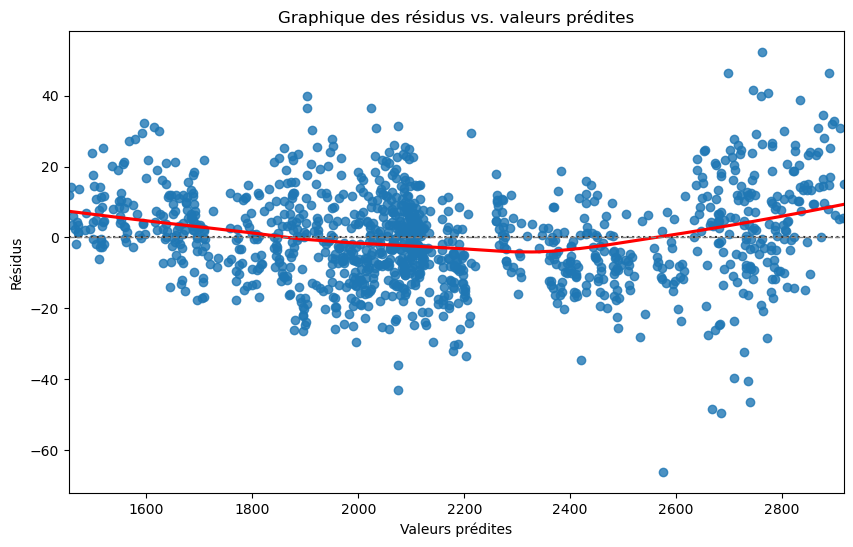

In [48]:
# Exclure l'intercept (s'il est présent dans la liste)
variables_list_no_intercept = [var for var in variables_list if var != 'Intercept']

# Créer X_train_final en excluant la colonne de l'intercept
X_train_final = X_train[variables_list_no_intercept]

# Calculer les valeurs prédites sur l'ensemble d'entraînement
Y_train_pred = final_model.predict(X_train_final)

# Calculer les résidus
residuals = Y_train - Y_train_pred

# Tracer le graphique des résidus par rapport aux valeurs prédites
plt.figure(figsize=(10, 6))
sns.residplot(x=Y_train_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus vs. valeurs prédites')
plt.show()

Interpretation:

indepence of risiduals:

test de Durbin-Watson

In [52]:
from statsmodels.stats.stattools import durbin_watson

# Effectuer le test de Durbin-Watson sur les résidus
dw_statistic = durbin_watson(residuals)

print(f"Statistique de Durbin-Watson : {dw_statistic:.4f}")

Statistique de Durbin-Watson : 1.9428


interpretation:

normality of risiduals

Q-Q Plot (Quantile-Quantile Plot)

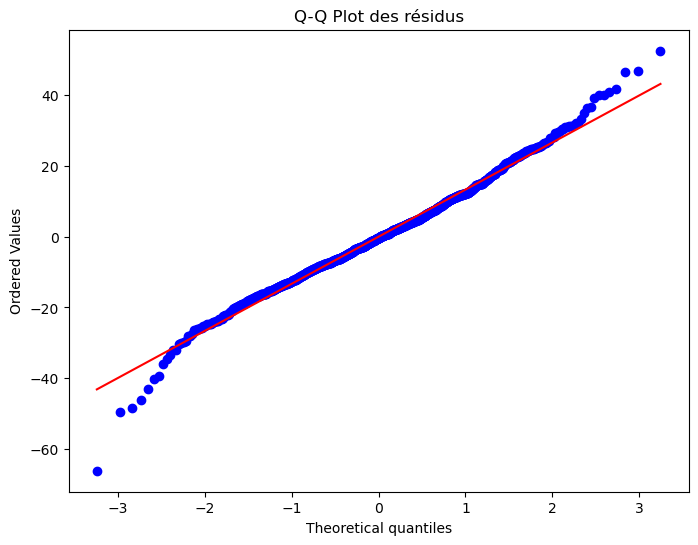

In [56]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Tracer le Q-Q plot pour les résidus
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des résidus')
plt.show()

interpretation:

### Optimisation algo

gradient descente:

In [60]:
# Liste des variables sélectionnées sans l'intercept
selected_variables = variables_list_no_intercept

In [61]:
# Extraire les données de test pour les variables sélectionnées
X_test_final = X_test[selected_variables].values  # S'assurer que les colonnes sont dans le bon ordre

In [62]:
# prediction function
def predict(X, weights, intercept):
    return np.dot(X, weights) + intercept

# function to calculat the RMSE
def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

Gradient descente algo function:

In [64]:
def mini_batch_gradient_descent(X, y, initial_weights, initial_intercept, learning_rate=0.001, epochs=1000, batch_size=32):
    n_samples, n_features = X.shape
    weights = initial_weights.copy()  # Initialiser les poids à partir des valeurs finales
    intercept = initial_intercept  # Initialiser l'intercept à partir de la valeur finale

    rmse_history = []

    for epoch in range(epochs):
        # Mélanger les données pour chaque epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Diviser les données en mini-batches
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Prédire les valeurs actuelles pour le mini-batch
            y_pred = predict(X_batch, weights, intercept)

            # Calculer l'erreur pour le mini-batch
            error = y_pred - y_batch

            # Calculer les gradients pour le mini-batch
            weights_gradient = (1 / len(y_batch)) * np.dot(X_batch.T, error)
            intercept_gradient = (1 / len(y_batch)) * np.sum(error)

            # Mettre à jour les coefficients
            weights -= learning_rate * weights_gradient
            intercept -= learning_rate * intercept_gradient

        # Calculer la RMSE globale pour l'epoch
        y_pred_epoch = predict(X, weights, intercept)
        rmse = compute_rmse(y, y_pred_epoch)
        rmse_history.append(rmse)

        # Afficher la RMSE toutes les 100 itérations
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: RMSE = {rmse}")

    return weights, intercept, rmse_history

I) calculat model matrics/performance before applying the gradient descent algo:

In [66]:
intercept = coefficients_list[0]
weights = coefficients_list[1:]

# Calculer les prédictions en utilisant les poids et l'intercept optimisés
y_pred_before = predict(X_test_final, weights, intercept)

# Calcul du MAE
mae_before = mean_absolute_error(Y_test, y_pred_before)

# Calcul du R^2
r2_before = r2_score(Y_test, y_pred_before)

# Compute rmse
rmse_before = compute_rmse(Y_test, y_pred_before)

# Calculer l'accuracy relative
relative_accuracy_before = 100 * (1 - np.mean(np.abs((Y_test - y_pred_before) / Y_test)))

II) calculate model matrics/performance after applying the gradient descent algo

1) we update the coefs using the training set

Epoch 0: RMSE = 13.340155543746647
Epoch 100: RMSE = 13.281896291423788
Epoch 200: RMSE = 13.266715670329814
Epoch 300: RMSE = 13.242015716594166
Epoch 400: RMSE = 13.228764054813736
Epoch 500: RMSE = 13.21701394567001
Epoch 600: RMSE = 13.214144913119323
Epoch 700: RMSE = 13.198400292940587
Epoch 800: RMSE = 13.19129512389519
Epoch 900: RMSE = 13.184479878484797
Epoch 1000: RMSE = 13.18019458914476
Epoch 1100: RMSE = 13.173476256385394
Epoch 1200: RMSE = 13.167858261222461
Epoch 1300: RMSE = 13.163105370171008
Epoch 1400: RMSE = 13.163250245968083
Epoch 1500: RMSE = 13.154782788117307
Epoch 1600: RMSE = 13.151269255801342
Epoch 1700: RMSE = 13.149411289965165
Epoch 1800: RMSE = 13.147534041930369
Epoch 1900: RMSE = 13.142126685089568
Epoch 2000: RMSE = 13.141149917294667
Epoch 2100: RMSE = 13.137038467117687
Epoch 2200: RMSE = 13.136049018454305
Epoch 2300: RMSE = 13.13998461957139
Epoch 2400: RMSE = 13.132401121753892
Epoch 2500: RMSE = 13.132590644880475
Epoch 2600: RMSE = 13.130172

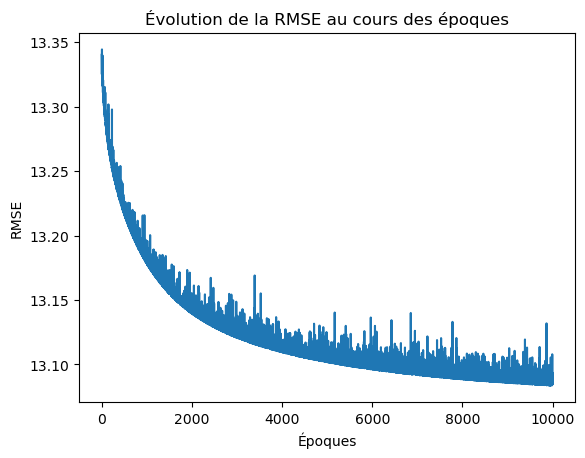

In [69]:
# Initialiser les coefficients et l'intercept à partir du modèle final
initial_weights = weights  # Exclut l'intercept
initial_intercept = intercept  # Prend l'intercept
variables_list = variables_list[1:]  # Liste des variables sans intercept

# Préparer les données pour la descente de gradient
# Assurez-vous que X_train contient uniquement les variables finales (dans le bon ordre)
X_train_final = X_train[variables_list].values  # Convertir en numpy array pour le calcul matriciel
Y_train = Y_train.values  # Convertir Y_train en array si nécessaire

# Appliquer la descente de gradient par mini-batch avec les valeurs initiales
learning_rate = 0.01
epochs = 10000
batch_size = 32  # Taille du mini-batch
final_weights, final_intercept, rmse_history = mini_batch_gradient_descent(X_train_final, Y_train, initial_weights, initial_intercept, learning_rate, epochs, batch_size)

# Afficher les résultats finaux
print("Coefficients optimisés :", final_weights)
print("Intercept optimisé :", final_intercept)
print("Dernière RMSE :", rmse_history[-1])

plt.plot(rmse_history)
plt.xlabel("Époques")
plt.ylabel("RMSE")
plt.title("Évolution de la RMSE au cours des époques")
plt.show()

2) model metrics with the coefs updated 

In [71]:
# Calculer les prédictions en utilisant les poids et l'intercept optimisés
y_pred = predict(X_test_final, final_weights, final_intercept)

# Calcul du MAE
mae_after = mean_absolute_error(Y_test, y_pred)

# Calcul du R^2
r2_after = r2_score(Y_test, y_pred)

# Compute rmse
rmse_after = compute_rmse(Y_test, y_pred)

# Calculer l'accuracy relative
relative_accuracy_after = 100 * (1 - np.mean(np.abs((Y_test - y_pred) / Y_test)))

III) compare the matrics/performances:

In [73]:
print("\nPerformance Metrics:")
print("Mean Absolute Error (MAE) before :", mae_before)
print("Mean Absolute Error (MAE) after : ", mae_after, "\n")

print("Coefficient of Determination (R^2) before :", r2_before)
print("Coefficient of Determination (R^2) after : ", r2_after, "\n")

print("RMSE before :", rmse_before)
print("RMSE after : ", rmse_after, "\n")

print("Relative Accuracy before :", relative_accuracy_before, "%")
print("Relative Accuracy after : ", relative_accuracy_after, "%")



Performance Metrics:
Mean Absolute Error (MAE) before : 10.392124184600956
Mean Absolute Error (MAE) after :  10.00485869954828 

Coefficient of Determination (R^2) before : 0.998764844629593
Coefficient of Determination (R^2) after :  0.9988426753628359 

RMSE before : 12.957627769065809
RMSE after :  12.542736644918866 

Relative Accuracy before : 99.51961009120694 %
Relative Accuracy after :  99.53427163489567 %


#### The final equation

In [75]:
# Generate the final equation as a readable string
equation = f"High_tomorrow = {final_intercept:.4f} * Intercept"  # Include the intercept first

# Add terms corresponding to the variables
for coef, var in zip(final_weights, variables_list):
    equation += f" + {coef:.4f} * {var}"

# Display the final equation
print("Final equation:")
print(equation)


Final equation:
High_tomorrow = 2084.8442 * Intercept + 209.3021 * Close + 6.7098 * Close_GOLD + 6.5502 * Close_VIX + 121.2965 * Close_T_chomage + 67.4711 * Close_NASDAQ + 10.5317 * Close_CPI + -1.4830 * Close_NFP + 32.3969 * MA_20 + -31.8456 * MA_50 + 32.3640 * MA_100 + 63.5581 * RSI_28 + 84.4169 * High + -13.8391 * Stoch_D + 1.3861 * MACD


*******************************************************

### Comparaison with decision trees model

#### 1) hyperparameters optimisation

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

Overview of hyperparameter tuning results:
                                             params         mae        rmse  \
0    {'criterion': 'squared_error', 'max_depth': 1}  166.448696  194.835062   
1    {'criterion': 'squared_error', 'max_depth': 2}   77.677594   95.108710   
2    {'criterion': 'squared_error', 'max_depth': 3}   44.939361   54.289991   
3    {'criterion': 'squared_error', 'max_depth': 4}   24.463626   30.187744   
4    {'criterion': 'squared_error', 'max_depth': 5}   14.529261   19.543631   
5    {'criterion': 'squared_error', 'max_depth': 6}   11.679987   16.107126   
6    {'criterion': 'squared_error', 'max_depth': 7}   11.373565   16.240724   
7    {'criterion': 'squared_error', 'max_depth': 8}   11.408932   16.171361   
8    {'criterion': 'squared_error', 'max_depth': 9}   11.847317   16.654413   
9     {'criterion': 'friedman_mse', 'max_depth': 1}  166.425161  194.795794   
10    {'criterion': 'friedman_mse', 'max_depth': 2}   77.766927   95.272507   
11    {'c

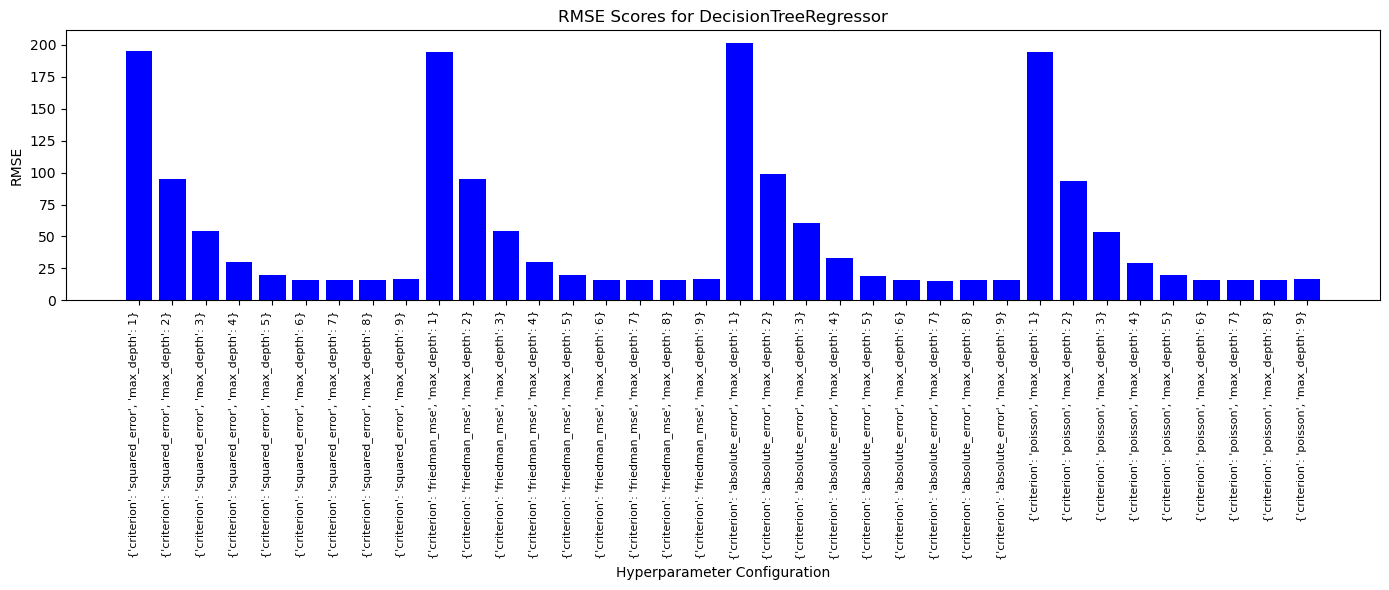

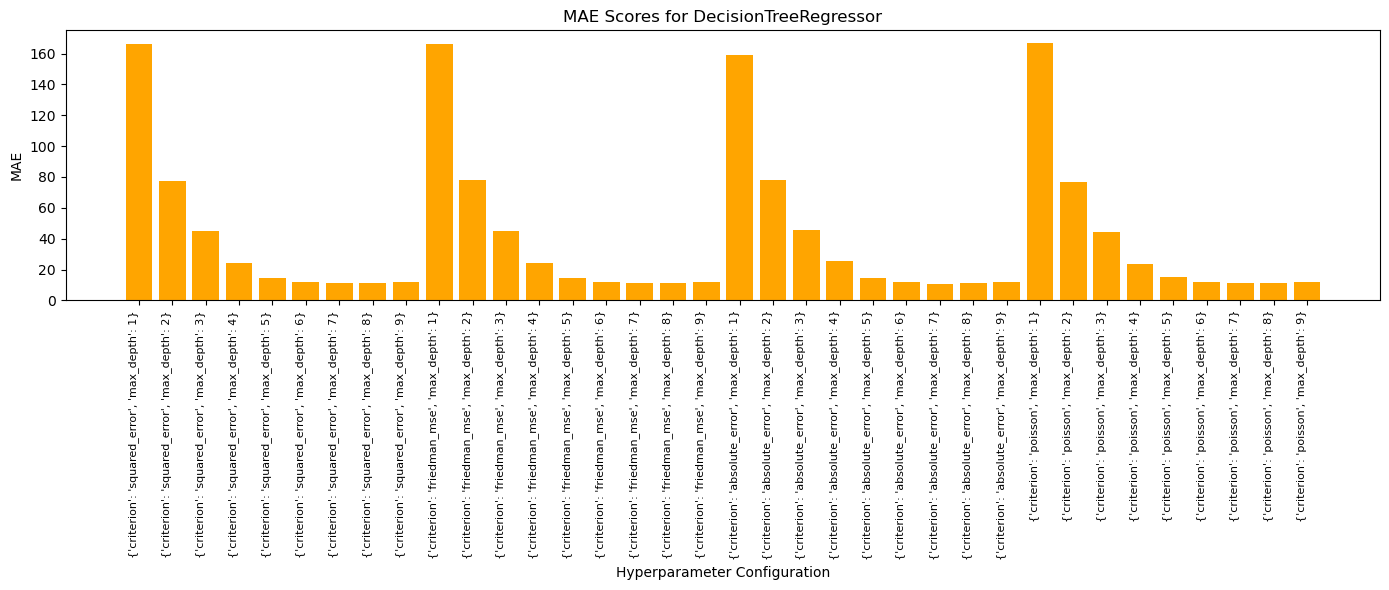

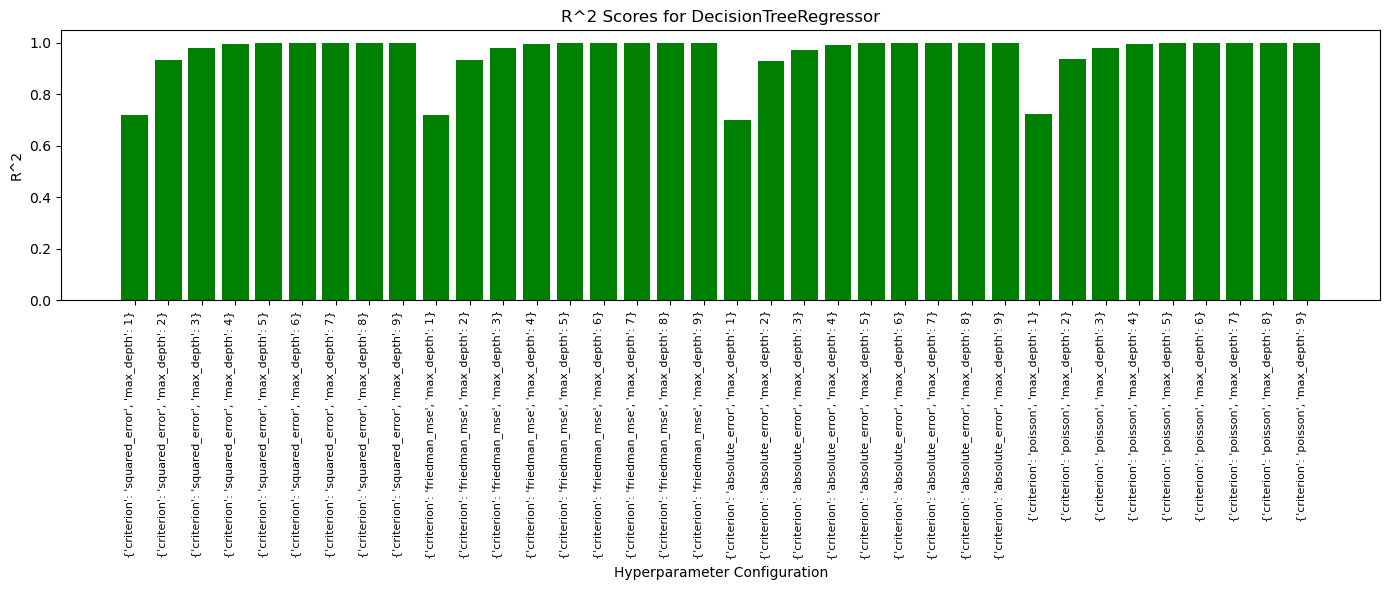

In [80]:
# Define hyperparameters for DecisionTreeRegressor
param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": range(1, 10)
}

# Define evaluation metrics
scoring = {
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'rmse': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
    'r2': make_scorer(r2_score)
}

# Initialize the model
model = DecisionTreeRegressor()

# GridSearchCV for hyperparameter tuning
search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring=scoring,
    refit='r2'  # Optimizes for the R^2 score
)

# Train the model with the full training set
search.fit(X_train, Y_train)

# Store results in a list
results = []
for i in range(len(search.cv_results_['params'])):
    params = search.cv_results_['params'][i]
    mae = search.cv_results_['mean_test_mae'][i]
    rmse = search.cv_results_['mean_test_rmse'][i]
    r2 = search.cv_results_['mean_test_r2'][i]
    results.append({
        'params': params,
        'mae': -mae,  # Reverse the sign because MAE is negative in GridSearchCV
        'rmse': -rmse,
        'r2': r2
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("Overview of hyperparameter tuning results:")
print(results_df)

# Visualize results
# Create a readable identifier for each configuration on the x-axis
results_df['config'] = results_df['params'].apply(lambda x: str(x))

# Bar chart for RMSE
plt.figure(figsize=(14, 6))
plt.bar(results_df['config'], results_df['rmse'], color='blue')
plt.title("RMSE Scores for DecisionTreeRegressor")
plt.xlabel('Hyperparameter Configuration')
plt.ylabel('RMSE')
plt.xticks(rotation=90, fontsize=8, ha='right')
plt.tight_layout()
plt.show()

# Bar chart for MAE
plt.figure(figsize=(14, 6))
plt.bar(results_df['config'], results_df['mae'], color='orange')
plt.title("MAE Scores for DecisionTreeRegressor")
plt.xlabel('Hyperparameter Configuration')
plt.ylabel('MAE')
plt.xticks(rotation=90, fontsize=8, ha='right')
plt.tight_layout()
plt.show()

# Bar chart for R^2
plt.figure(figsize=(14, 6))
plt.bar(results_df['config'], results_df['r2'], color='green')
plt.title("R^2 Scores for DecisionTreeRegressor")
plt.xlabel('Hyperparameter Configuration')
plt.ylabel('R^2')
plt.xticks(rotation=90, fontsize=8, ha='right')
plt.tight_layout()
plt.show()

Best Hyperparameter Configuration:<br/>
criterion: 'absolute_error'<br/>
max_depth: 7<br/>
MAE: 10.870474<br/>
RMSE: 15.015249<br/>
R^2: 998340

#### calculating the matrics/perf on test set

In [83]:
# Best configuration
best_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=7)

# Train the model on the training set
best_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_DecisionTreeRegressor = best_model.predict(X_test)

# Calculate metrics on the test set
DecisionTreeRegressor_mae = mean_absolute_error(Y_test, y_pred_DecisionTreeRegressor)
DecisionTreeRegressor_rmse = mean_squared_error(Y_test, y_pred_DecisionTreeRegressor, squared=False)
DecisionTreeRegressor_r2 = r2_score(Y_test, y_pred_DecisionTreeRegressor)

# Nouvelle formule pour DecisionTreeRegressor_relative_accuracy
DecisionTreeRegressor_relative_accuracy = 100 * (1 - np.mean(np.abs((Y_test - y_pred_DecisionTreeRegressor) / Y_test)))

In [84]:
print("\nPerformance Metrics Comparaison between both models:")

print("Mean Absolute Error (MAE) Regression model : ", mae_after)
print("Mean Absolute Error (MAE) DecisionTreeRegressor model :", DecisionTreeRegressor_mae, "\n")

print("Coefficient of Determination (R^2) Regression model : ", r2_after)
print("Coefficient of Determination (R^2) DecisionTreeRegressor model :", DecisionTreeRegressor_r2, "\n")

print("RMSE Regression model : ", rmse_after)
print("RMSE DecisionTreeRegressor model:", DecisionTreeRegressor_rmse, "\n")

print("Relative Accuracy Regression model : ", relative_accuracy_after, "%")
print("Relative Accuracy DecisionTreeRegressor model :", DecisionTreeRegressor_relative_accuracy, "%")



Performance Metrics Comparaison between both models:
Mean Absolute Error (MAE) Regression model :  10.00485869954828
Mean Absolute Error (MAE) DecisionTreeRegressor model : 10.791554054054055 

Coefficient of Determination (R^2) Regression model :  0.9988426753628359
Coefficient of Determination (R^2) DecisionTreeRegressor model : 0.9981842438437796 

RMSE Regression model :  12.542736644918866
RMSE DecisionTreeRegressor model: 15.710625164974319 

Relative Accuracy Regression model :  99.53427163489567 %
Relative Accuracy DecisionTreeRegressor model : 99.49974312068626 %


#### Plot the results of both models

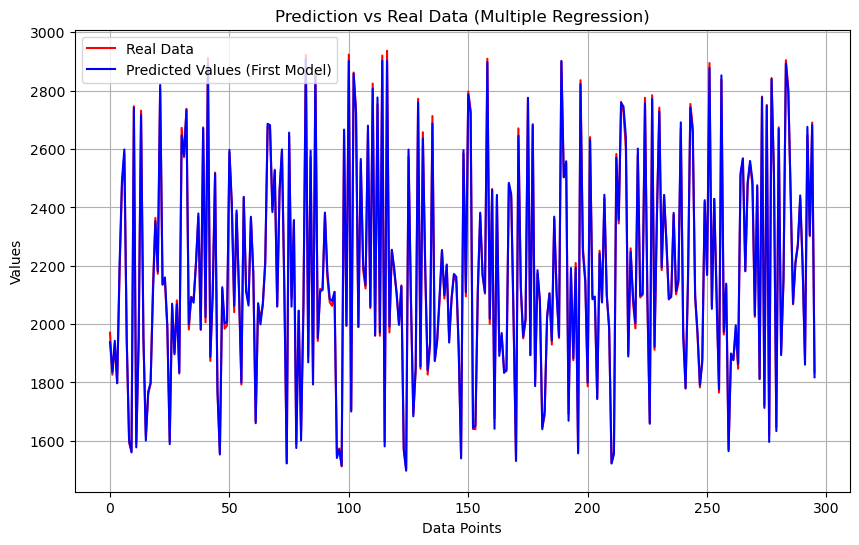

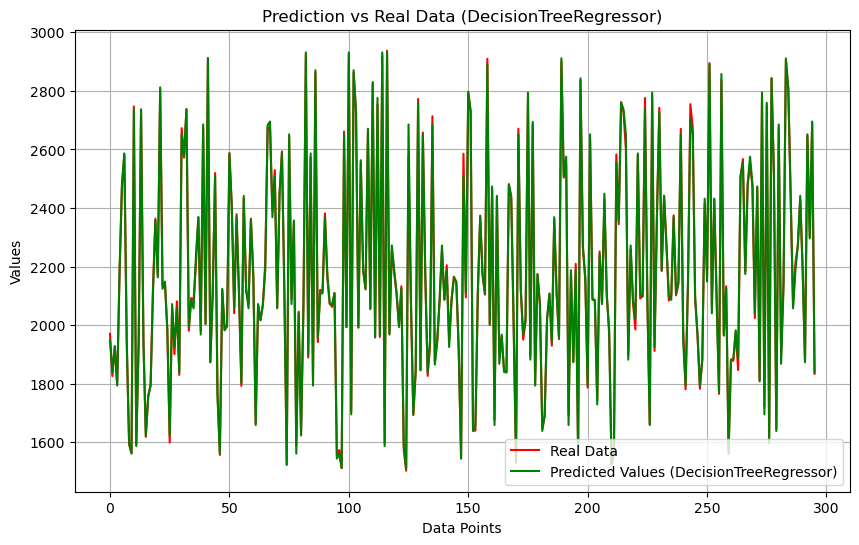

In [86]:
# Plot 1: Real data vs predicted values for Multiple Regression model
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, color='red', label='Real Data')
plt.plot(range(len(y_pred)), y_pred, color='blue', label='Predicted Values (First Model)')
plt.title("Prediction vs Real Data (Multiple Regression)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Real data vs predicted values for DecisionTreeRegressor
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, color='red', label='Real Data')
plt.plot(range(len(y_pred_DecisionTreeRegressor)), y_pred_DecisionTreeRegressor, color='green', label='Predicted Values (DecisionTreeRegressor)')
plt.title("Prediction vs Real Data (DecisionTreeRegressor)")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()